In [ ]:
!pip install cmapy

In [2]:
import os
import cv2
import cmapy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display as lbd

In [3]:
def create_mel_raw(current_window, sr, n_mels=128, f_min=100, f_max=16000, nfft=2048, hop=512, resz=1):
    S = lb.feature.melspectrogram(y=current_window, sr=sr, n_mels=n_mels, fmin=f_min, fmax=f_max, n_fft=nfft, hop_length=hop)
    S = lb.power_to_db(S, ref=np.max)
    S = (S-S.min()) / (S.max() - S.min())
    S *= 255
    img = cv2.applyColorMap(S.astype(np.uint8), cmapy.cmap('magma'))
    height, width, _ = img.shape
    if resz > 0:
        img = cv2.resize(img, (width*resz, height*resz), interpolation=cv2.INTER_LINEAR) #bicubic interpolation
    img = cv2.flip(img, 0)
    return img

In [4]:
audio_path = '/content/drive/MyDrive/hack/processed_audio_files_7sec_22050/102_1b1_Ar_sc_Meditron_1.wav'
sr = 16000
test_audio, _ = lb.load(audio_path, sr=sr)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


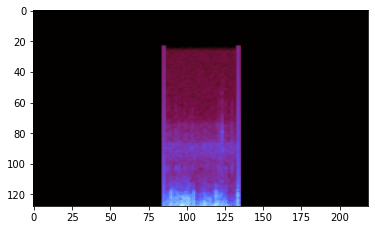

In [5]:
test_img = create_mel_raw(test_audio, sr)
plt.imshow(test_img)

In [6]:
n_mels=128
f_min=100
f_max=16000
nfft=2048
hop= nfft//4

In [7]:
audio_image = cv2.cvtColor(create_mel_raw(test_audio, sr, n_mels, f_min, f_max, nfft, hop, resz=3), cv2.COLOR_BGR2RGB)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


In [8]:
#blank region clipping
audio_raw_gray = cv2.cvtColor(create_mel_raw(test_audio, sr, n_mels, f_min, f_max, nfft, hop), cv2.COLOR_BGR2GRAY)

audio_raw_gray[audio_raw_gray < 10] = 0
for row in range(audio_raw_gray.shape[0]):
    black_percent = len(np.where(audio_raw_gray[row,:]==0)[0])/len(audio_raw_gray[row,:])
    if black_percent < 0.80:
        break

if (row+1)*3 < audio_image.shape[0]:
    audio_image = audio_image[(row+1)*3:, :, :]
audio_image = cv2.resize(audio_image, (audio_image.shape[1], n_mels*3), interpolation=cv2.INTER_LINEAR)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


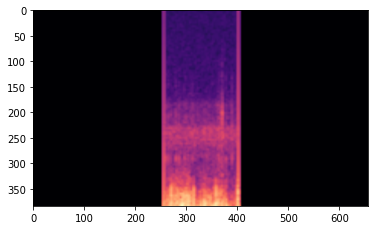

In [9]:
plt.imshow(audio_image)

In [12]:
audio_image.shape

(384, 657, 3)